In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv(".\dataset\driver_delivery_speed.csv",sep="\t")
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [28]:
suffleDf=df.sample(frac=1)
suffleDf

,Driver_ID,Distance_Feature,Speeding_Feature
2066,3423310866,60.46,4.0
3840,3423313774,189.25,7.0
1080,3423311686,46.41,5.0
1071,3423314024,50.47,1.0
1612,3423310630,53.80,3.0
...,...,...,...
1361,3423310486,45.08,4.0
1417,3423312687,64.19,4.0
1904,3423311028,65.17,2.0
417,3423311771,63.59,21.0


In [29]:
suffleDf.drop(["Driver_ID"],axis=1)

,Distance_Feature,Speeding_Feature
2066,60.46,4.0
3840,189.25,7.0
1080,46.41,5.0
1071,50.47,1.0
1612,53.80,3.0
...,...,...
1361,45.08,4.0
1417,64.19,4.0
1904,65.17,2.0
417,63.59,21.0


Text(0, 0.5, 'Speeding Feature')

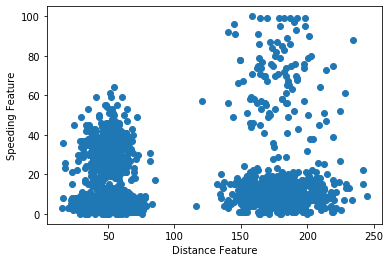

In [30]:
plt.scatter(suffleDf["Distance_Feature"],suffleDf["Speeding_Feature"])
plt.xlabel('Distance Feature')
plt.ylabel('Speeding Feature')

In [31]:
from sklearn.cluster import KMeans

In [41]:
ClusteringModel=KMeans(n_clusters=4).fit(suffleDf[["Distance_Feature","Speeding_Feature"]])
ClusteringModel.labels_

array([2, 1, 2, ..., 2, 0, 1])

In [42]:
dfWithLabel=list(zip(suffleDf[["Distance_Feature","Speeding_Feature"]].values,ClusteringModel.labels_))
centroids=ClusteringModel.cluster_centers_

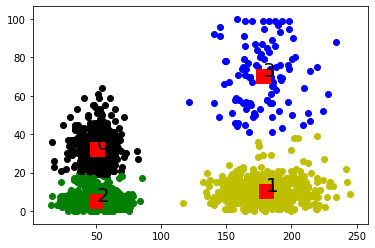

In [47]:
color=['k','y','g','b']
for i in dfWithLabel:
    plt.scatter(i[0][0],i[0][1],c=color[i[1]%len(color)])
#plt
plt.scatter(centroids[:,0],centroids[:,1],marker='s',c='r',s=200)
for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0],centroids[i][1]),fontsize=20)

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
silhouette_score(suffleDf[["Distance_Feature","Speeding_Feature"]],ClusteringModel.labels_)

0.5911323766293183